# Основы статистики. Часть 2.

## Содержание
[2.1 T-распределение](#2.1)  
[2.2 Сравнение двух средних; t-критерий Стьюдента](#2.2)  
[2.3 Проверка распределения на нормальность, QQ-Plot](#2.3)  
[2.4 Однофакторный дисперсионный анализ](#2.4)  
[2.5 Множественные сравнения в ANOVA](#2.5)  
[...](#2.6)  
[...](#2.7)

## 2.1 T-распределение<a id='2.1'></a>

### Основные определения и тезисы:

**Степень свободы(degrees of freedom - df)** - количество значений, используемых при вычислении переменной.  
*Например, есть 50 независимых значений, и необходимо вычислить одну-единственную статистику "среднее". Согласно формуле, степеней свободы будет 50 - 1 = 49*.

Формула отклонения **среднего выборки(x_mean)** от **среднего ГС(M)** в единицах **стандартной ошибки среднего(se)**:
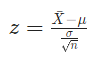  
z имеет стандартное нормальное распределение со средним = 0 и стандартным отклонением = 1.  

На практике почти никогда не известно **стандартное отклонение ГС (σ)**, и для расчета стандартной ошибки используется выборочное **стандартное отклонение(sd)**. В таком случае распределение отклонения x_mean от M будет описываться при помощи **t-распределения**:
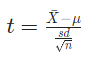

**Распределение Стьюдента (t-distribution)** - представляет собой сумму нескольких нормально распределенных случайных величин. Чем больше величин, тем больше верятность, что их сумма будет иметь нормальное распределение.  
* С увеличением степеней свободы (**df = n - 1**) форма распределения стремится к нормальной;  
* t-распределение унимодально и симметрично, но наблюдения с большей вероятностью попадают за пределы +- **2σ** от **M**.   
 
**Применение t-распределения:**  

Первая выборка - это выборка из пациентов, которые не принимали новое лекарство.  
А вторая выборка - из пациентов, которые его принимали.  
Таким образом, если сравнивать две выборки по t-критерию:
* нулевая гипотеза - лекарство не работает, выборки принадлежат одной ГС;
* альтернативная гипотеза - лекарство работает, выборки принадлежат разным ГС.

### Примеры:

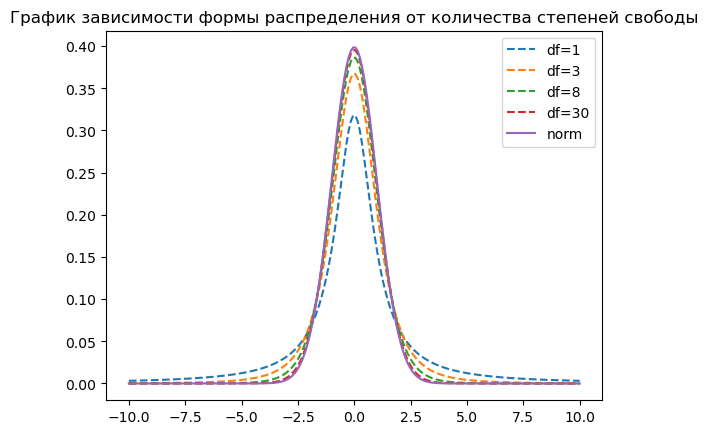

In [47]:
"""Зависимость формы распределения при увеличении количества степеней свободы."""
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 200)
# Чем больше степеней свободы, тем ближе распределение к нормальному
y1 = stats.t.pdf(x, df = 1)  # 2 наблюдения
y2 = stats.t.pdf(x, df = 3)  # 4 наблюдения
y3 = stats.t.pdf(x, df = 8)  # 9 наблюдений
y4 = stats.t.pdf(x, df = 30) # 31 наблюдение
y5 = stats.norm.pdf(x)       # нормальное распределение

plt.title('График зависимости формы распределения от количества степеней свободы')
plt.plot(x, y1, '--')
plt.plot(x, y2, '--')
plt.plot(x, y3, '--')
plt.plot(x, y4, '--')
plt.plot(x, y5)
plt.legend(('df=1', 'df=3', 'df=8', 'df=30', 'norm'))
plt.show()

In [48]:
"""Работа с нормальным распределением - отклоняется H0"""
from scipy import stats

M = 10            # Среднее ГС
x_mean = 10.8     # среднее выборки
sd = 2            # стандартное отклонение
N = 25            # кол-во наблюдений

# стандартное отклонение распределения в соответствии с ЦПТ
se = sd / N**0.5  # se = 0.4

# рассчет насколько x_mean отклонилось от M в единицах стандартного отклонения
z = (x_mean - M) / se # z = 2 - Отклонение на 2 вправо

# рассчет p-уровня значимости
# stats.norm.cdf рассчитывает площадь под нормального распределения до значения z.
p = 2*(1-stats.norm.cdf(z)) # p = 0.455...
# в таком случае можно отклонить H0 т.к. p < 0,05
print("Вероятность получить z=2 в обе стороны(p) =", round(p*100, 2), "%")
if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу , т.к. p < 0,05')
else:
    print('p =', p, ', принимаем нулевую гипотезу, т.к. p > 0,05')

Вероятность получить z=2 в обе стороны(p) = 4.55 %
p = 0.045500263896358195 , отклоняем нулевую гипотезу , т.к. p < 0,05


In [49]:
"""Та же выборка, работа с t-распределением - H0 не отклоняется"""
from scipy import stats

M = 10            # Среднее ГС
x_mean = 10.8     # среднее выборки
sd = 2            # стандартное отклонение
N = 25            # кол-во наблюдений
df = N - 1        # степень свободы

# se = sd / (df)**0.5  # se = 0.4

# рассчет насколько x_mean отклонилось от M в единицах стандартного отклонения
t = 2 # предполагается, что t = я из шага выше.

# рассчет p-уровня значимости
# stats.t.cdf рассчитывает площадь под кривой t-распределения до значения t.
p = 2*(1-stats.t.cdf(t, df)) # p = 0.569...
# в этом случае отклонить H0 уже нельзя т.к. p > 0,05
print("Вероятность получить z=2 в обе стороны(p) =", round(p*100, 2), "%")
if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу , т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')

Вероятность получить z=2 в обе стороны(p) = 5.69 %
p = 0.056939849936591624 , нулевую гипотезу отклонить нельзя, т.к. p > 0,05


In [50]:
"""Если на выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: M = 10.
   и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости  (двусторонний) равен:"""
from scipy import stats

t = -2
N = 15
df = 15 - 1

p = 2*(1-stats.t.cdf(abs(t), df))
print(f'p = {p:.3f}')

p = 0.065


## 2.2 Сравнение двух средних; t-критерий Стьюдента<a id='2.2'></a>

### Основные определения и тезисы:

**t-критерий Стьюдента (парный t-test)** - общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства **средних значений двух выборок(x_mean)**.  Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение.  
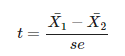  
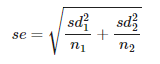  
*df = N_1 + N_2 - 2*  

### Примеры:

In [51]:
'''Пошаговое сравнение двух выборочных средних'''
from scipy import stats
import numpy as np

# 2 выборки наблюдений
sample_1 = [84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3,
            99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5]
sample_2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102,
            69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5]

# размер выборок
N_1 = len(sample_1)
N_2 = len(sample_2)
print("N_1 =", N_1)
print("N_2 =", N_2, "\n")

# среднее выборок
x_mean_1 = sum(sample_1) / N_1
x_mean_2 = sum(sample_2) / N_2
print("x_mean_1 =", x_mean_1)
print("x_mean_2 =", x_mean_2, "\n")

# дисперсия
m_deviation_1 = 0    
for i in sample_1:
    m_deviation_1 += (i - x_mean_1)**2
D_1 = m_deviation_1 / (N_1-1)

m_deviation_2 = 0    
for j in sample_2:
    m_deviation_2 += (j - x_mean_2)**2
D_2 = m_deviation_2 / (N_2-1)

# стандартное отклонение
sd_1 = D_1**0.5
sd_2 = D_2**0.5

print("sd_1 =", sd_1)
print("sd_2 =", sd_2, "\n")

# H0 - M1=M2
# H1 - M1≠M2

# стандартная ошибка среднего
se = ((sd_1**2 / N_1) + (sd_2**2 / N_2))**0.5
print("se =", se)
# t-критерий
t = (x_mean_1 - x_mean_2) / se
print("t-criteria =", t, "\n")
# степень свободы
df = N_1 + N_2 - 2
# вероятность отлонения превышающего t в обе стороны
p = 2*(1-stats.t.cdf(abs(t), df))

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу. Выборки значимо различаются между собой т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')

N_1 = 20
N_2 = 20 

x_mean_1 = 100.815
x_mean_2 = 75.735 

sd_1 = 10.246502612573408
sd_2 = 15.458102116774606 

se = 4.146949100496082
t-criteria = 6.047819587898917 

p = 4.894702898550207e-07 , отклоняем нулевую гипотезу. Выборки значимо различаются между собой т.к. p < 0,05


In [52]:
"""Визуализация с помощью pandas и matplotlib"""
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np

# подготовка Dataframe
sample_1 = np.array([84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3,
                     99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5])
sample_2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102,
                     69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5])

data = pd.DataFrame({'sample_1':sample_1, 'sample_2':sample_2}).agg(['count','mean','std','sem']).transpose().\
                        rename(columns={'count':'N','mean':'x_mean','std':'sd','sem':'se'})

# расчет 95% интервала отклонения среднего
K = stats.t.ppf((1 + 0.95)/2, data['x_mean']-1)
data['interval'] = K * data['se']
data

,N,x_mean,sd,se,interval
sample_1,20.0,100.815,10.246503,2.291188,4.545754
sample_2,20.0,75.735,15.458102,3.456537,6.886174


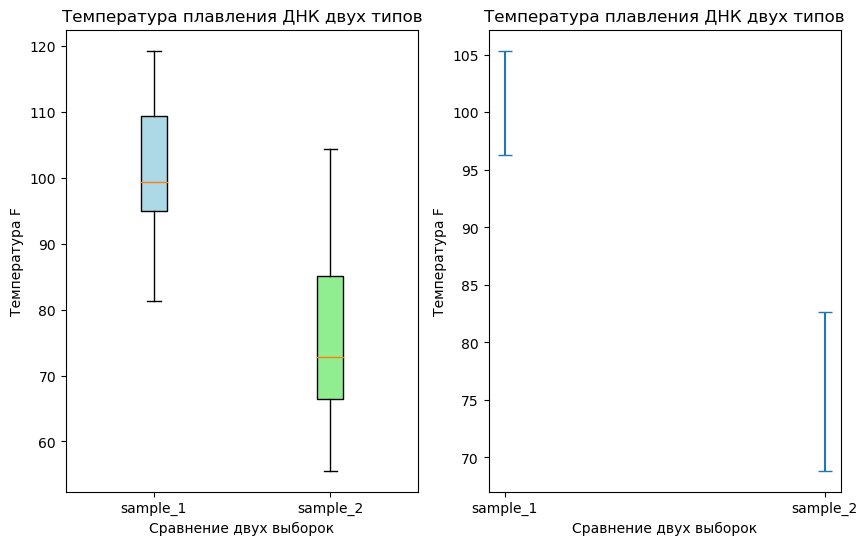

In [53]:
"""Построение графика"""
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
samples = [sample_1, sample_2]

# боксплот
bp = ax1.boxplot(samples, patch_artist = True) 

colors = ['lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xticklabels(['sample_1', 'sample_2']) 
    
    
# график доверительных интервалов
eb = ax2.errorbar(x=data.index, y=data['x_mean'], yerr=data['interval'], capsize=5, fmt = 'none')

for ax in [ax1, ax2]:   
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')


plt.show(bp)

**Пример интерпритации доверительных интервалов:**  
Ваш друг Ярослав изучает статистику и недавно прочитал статью, в которой исследовались различия между средними значениями числа рибосом двух различных типов бактерий. Ярослав просит Вас объяснить ему, что означает высказывание: "95% доверительный интервал для разности между средними значениями рибосом двух типов бактерий M_type_1 - M_type_2 оказался равен от 100 до 300”.  


In [54]:
"""Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала,
   особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала
   мы использовали формулу x_mean +- 1.96 * (sd/N**0.5).
   Рассчитайте доверительный интервал основываясь на знании t - распределения
   для среднего значения температуры плавления ДНК у первого вида:
   x_mean = 89.9, sd = 11.3, N = 20.
   Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего
   t - распределения (df = N - 1) и используйте это значение вместо коэффициента 1,96."""

x_mean = 89.9 # Выборочное среднее
sd = 11.3     # Выборочное стандартное отклонение
N = 20        # Количество наблюдений
df = N-1      # Количество степеней свободы

se = sd / N**0.5 # Стандартная ошибка = 2.52...
K = stats.t.ppf(1-0.025, df) # Доверительный интервал

x_min = x_mean - K * se
x_max = x_mean + K * se
print('Приблизительно 95% всех наблюдений находится в диапазоне ', [x_min, x_max])

Приблизительно 95% всех наблюдений находится в диапазоне  [84.61143720745503, 95.18856279254499]


In [55]:
"""Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929.
   Данные гистограммы демонстрируют распределение возраста победителей с 1929 по
   2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать
наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.
Средний возраст женщин равен 34, sd = 10."""

x_mean_m = 45
x_mean_w = 34

N_m = 100
N_w = 100

sd_m = 9
sd_w = 10

# H0 - M1=M2
# H1 - M1≠M2

se = ((sd_m**2 / N_m) + (sd_w**2 / N_w))**0.5

t = (x_mean_m - x_mean_w) / se

df = N_m + N_w - 2

p = 2*(1-stats.t.cdf(abs(t), df))

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')


p = 3.441691376337985e-14 , отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05


In [56]:
"""Решение с помощью scipy"""
from scipy import stats
stats.ttest_ind_from_stats(45, 9, 100, 34, 10, 100) # mean1, std1, nobs1, mean2, std2, nobs2

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')

p = 3.441691376337985e-14 , отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05


## 2.3 Проверка распределения на нормальность, QQ-Plot<a id='2.3'></a>

### Основные определения:
**Гистограмма частот** с наложенным поверх **z-распределением** - наглядно показывает отклонение выборочных значений от нормального распределения.

**QQ-plot** - показывает насколько выборочные значения соответствуют, предсказанным значанием идеально нормального распределения. Пока точки на прямой - идеальное соответствие с нормальным распределением. Если над или под прямой, то значения слишком большие/маленькие соответственно.  
Удобно использовать, когда не очень много наблюдений.

**Тест Колмагорова-Смирнова**  
**Тест Шапиро-Уилка**

**Выбросы** - слишком высокие или слишком низкие значения в выборке. Могут оказать значительное влияяние на результаты t-теста.

**U-критерий Манна-Уитни** - используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками. Переводит измерения в ранговую шкалу.
Не так чувствителен к выбросам как t-тест.

### Примеры:

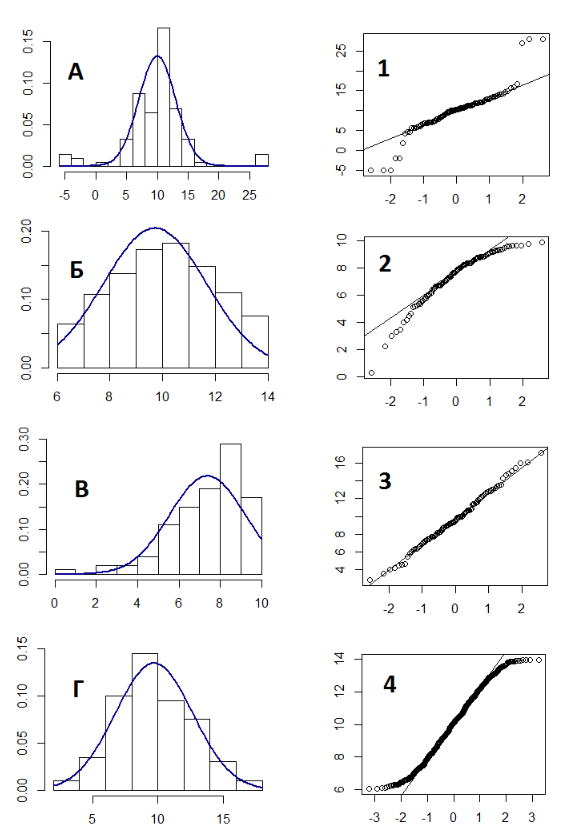  
**А** - 1  
**Б** - 4  
**В** - 2  
**Г** - 3  

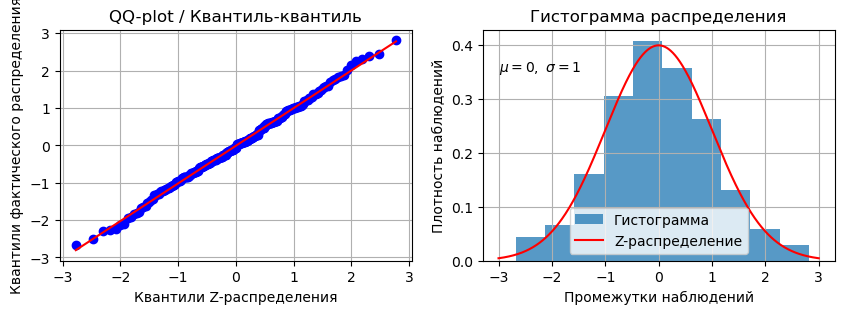

In [57]:
"""Пример построения гистограммы частот и QQ-plot"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# генерация нормального распределения 
M = 0  
sd = 1   
N = 250 
sample = np.random.normal(loc=M, scale=sd, size=N)  

# график QQ-plot
plt.figure(figsize = [5*2, 3])
plt.subplot(1, 2, 1)

# создание графика QQ-plot при помощи функции по поиску квантелей значений нашего распределения
stats.probplot(sample, dist="norm", plot=plt)  

plt.title('QQ-plot / Квантиль-квантиль') 
plt.xlabel('Квантили Z-распределения')  
plt.ylabel('Квантили фактического распределения') 
plt.grid(True)

# Гистограмма
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(sample, 10, density=True, alpha=0.75, label='Гистограмма')

plt.title('Гистограмма распределения')  
plt.xlabel('Промежутки наблюдений')  
plt.ylabel('Плотность наблюдений')  
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$') 
plt.grid(True) 

# график z-распределения поверх гистограммы
x = np.linspace(M - 3*sd, M + 3*sd, 1000)

plt.plot(x, stats.norm.pdf(x, M, sd), color='red', label='Z-распределение') 


plt.legend()  

plt.show() 

## 2.4 Однофакторный дисперсионный анализ<a id='2.4'></a>

### Основные тезисы и определения:
**Однофакторный дисперсионный анализ** - используется когда необходимо сравнить **несколько** групп между собой(рассмотренный ранее t-критерий Стьюдента предназначен для сравнения только двух совокупностей). Предполагается, что вся изменчивость данных может быть обусловленна 2 показателями:
1) межгрупповым средним квадратом (MSbg = SSB/SSB_df);
2) внутригрупповоым средним квадратом (MSwg = SSW/SSW_df).  

Если межгрупповой показатель значительно превышает внутригрупповой, то весьма вероятно, что как минимум 2 группы(2 средних значения) значимо отличаются друг от друга. Для того чтобы узнать насколько это вероятно, с помощью **F-значения**, рассчитывается **п-уровень значимости (p)**.  
Данный анализ называется **однофакторным**, т.к. в качестве **независимой переменной** используется только один фактор.

**Общая сумма квадратов (sum of squares total - SST)** - характеризует насколько высока изменчивость данных без учета разделения их на группы. SST деленная на число всех наблюдений минус один (SST/SST_df) - это дисперсия, расчитанная для всех наблюдений без учета деления на группы.  
SST состоит из двух источников (SST = SSB + SSW):
* **Межгрупповая сумма квадратов (SSB)**  - насколько вариативны группы между собой;
* **Внутригрупповая сумма квадратов (SSW)** - насколько вариативны значения группы.  
Чем больше дисперсия внутри групп, тем больше значение внутригруппового квадрата (при неизменном количестве наблюдений).  

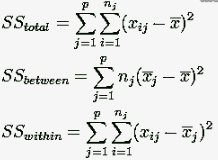

**F-значение** - основной статистический показатель дисперсионного анализа. Представляет собой отношение межгрупповой изменчивости к внутригрупповой (F = MSbg/MSwg).
* Чем больше группы схожи, тем меньше F-значение;
* Всегда принимает положительные значения (вероятность отклонения рассчитывается только вправо);
* Не является нормальным, подчиняется распределению Фишера (F distribution).  
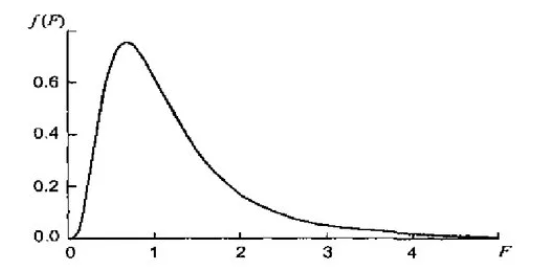  


**Независимая переменная** - разделяет наблюдения на группы(номинативная переменная с несколькими градациями).  
**Зависимая переменная** - количественная переменная, по степени выраженности которой сравниваются группы.

*Например: Есть 3 типа лечения, необходимо понять, есть ли между ними разница. Здесь независимая переменная - тип лечения(тип1, тип2, тип3). Зависимая переменная - некая величина, у каждого испытуемого, которая покажет насколько успешно было лечение(продолжительность  симптомов, средняя температура в течении недели после лечения, уровень вещества в крови и т.д.)*

### Примеры:

In [58]:
"""Однофакторный дисперсионный анализ"""
from scipy import stats
import pandas as pd

data = pd.DataFrame({'1': [3, 1, 2],
                   '2': [5, 3, 4],
                   '3': [7, 6, 5]})

# H0 - M1=M2=M3
# H1 - M1≠M2 или M2≠M3 или M1≠M3 (хотя бы пара средних не равны)

N = data.count(axis=1).sum() # количество всех элементов = 9
m = data.shape[1] # количество групп = 3
tot_mean = data.values.flatten().mean() # среднее значение по всем элементам = 4

# общая сумма квадратов = 30
SST = 0
for column in range(data.shape[1]):
    for row in range(data.shape[0]):
        SST += (data.iloc[row,column] - tot_mean)**2

# степени свободы общей суммы квадратов (число независимых элементов при рассчете показателя) = 9
# "забывается" один из элементов
# число всех элементов - 1 (можно найти "забытый" элемент зная SST и все остальные элементы)
SST_df = N-1

# межгрупповая сумма квадратов = 24
SSB = 0
for column in range(data.shape[1]):
    group_mean = data.iloc[:,column].mean() # среднее группы
    n = data.iloc[:,column].count() # количество элементов в группе
    SSB += n*(group_mean - tot_mean)**2

# степени свободы межгрупповой суммы квадратов = 2 
# "забывается" среднее значение одной из групп
# число средних значений групп - 1 (можно найти "забытое" среднее значение зная SSB и 2 оставшихся групповых средних)
SSB_df = m-1

# внутригрупповая сумма квадратов = 6
SSW = 0
for column in range(data.shape[1]):
    group_mean = data.iloc[:,column].mean() # среднее группы
    for row in range(data.shape[0]):
        SSW += (data.iloc[row,column] - group_mean)**2

# степени свободы внутригрупповой суммы квадратов = 6
# забывается один из элементов в каждой группе
# число всех элементов - число средних значений групп (можно найти "забытые" элементы групп зная SSW и средние этих групп)
SSW_df = N-m

# SST = SSW+SSB (SST = 30; SSB = 24; SSW = 6)
# Если большая часть SST состоит из SSB (SSB > SSW) - группы значительно различаются между собой
# Если большая часть SST состоит из SSW (SSW > SSB) - группы не различаются, но имеется высокая внутригрупповая изменчивость

# меж и внутри групповые средние квадраты
MSbg = SSB/SSB_df
MSwg = SSW/SSW_df

# f-значение = 12
# Чем больше группы схожи, тем меньше F-значение
f_value = MSbg / MSwg

# p = 0.008...
p = stats.f.sf(f_value, SSB_df, SSW_df)
print("p < 0.05, отклоняем нулевую гипотезу.")

p < 0.05, отклоняем нулевую гипотезу.


In [59]:
"""Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) получено F = 3.5, тогда:"""
m = 4
N = 4*5
f_value = 3.5

SSB_df = m-1
SSW_df = N-m
p = stats.f.sf(f_value, SSB_df, SSW_df)


if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05')
else:
    print('p =', p, ', принимаем нулевую гипотезу о равенстве средних, т.к. p > 0,05')

p = 0.040052541494826094 , отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05


### Однофакторный дисперсионый анализ One-way ANOVA

In [60]:
"""Генотерапия позволяет корректировать работу дефективного гена, ответственного за развитие заболевания.
   В эксперименте сравнивалась эффективность четырех различных видов терапии. Результаты исследования
   представлены в таблице 'genetherapy.csv'."""

data = pd.read_csv("data_genetherapy.csv")

# Независимая переменная - 4 вида терапии (Therapy)
# Зависимая - уровень экспрессии гена (expr)
data.head(3)

,expr,Therapy
0,100,A
1,96,A
2,101,A


In [61]:
"""Подготовка df"""
data_pivoted = data.copy()
data_pivoted = data.pivot(index = None, columns='Therapy', values='expr')

rows = 0
for column in data_pivoted.columns:
    data_pivoted[column] = data_pivoted[column].shift(rows)
    rows -= 15
data_pivoted.dropna(inplace=True)
data_pivoted

Therapy,A,B,C,D
0,100.0,100.0,91.0,92.0
1,96.0,100.0,96.0,85.0
2,101.0,95.0,94.0,95.0
3,95.0,84.0,96.0,89.0
4,103.0,101.0,91.0,91.0
5,99.0,101.0,85.0,91.0
6,97.0,95.0,98.0,99.0
7,96.0,106.0,93.0,94.0
8,98.0,105.0,100.0,97.0
9,106.0,97.0,85.0,94.0


In [62]:
"""Вычисление p-value и вывод"""
# H0 - M1=M2=M3=M4
# H1 - M1≠M2≠M3≠M4 (хотя бы пара средних не равны)

# общее количество наблюдений
N = data_pivoted.count(axis=1).sum()
print("N =", N)
# количество групп
m = data_pivoted.shape[1]
print("m =", m)
# среднее значение по всем наблюдениям
tot_mean = data_pivoted.values.flatten().mean()
print("tot_mean =", tot_mean)

# Межгрупповая сумма квадратов и степень свободы
SSB = 0
for column in range(data_pivoted.shape[1]):
    group_mean = data_pivoted.iloc[:,column].mean() # среднее группы
    n = data_pivoted.iloc[:,column].count() # количество наблюдений в группе
    SSB += n*(group_mean - tot_mean)**2
print("SSB =", SSB)

SSB_df = m-1
print("SSB_df =", SSB_df)

# Внутригрупповая сумма квадратов и степень свободы
SSW = 0
for column in range(data_pivoted.shape[1]):
    group_mean = data_pivoted.iloc[:,column].mean() # среднее группы
    for row in range(data_pivoted.shape[0]):
        SSW += (data_pivoted.iloc[row,column] - group_mean)**2
print("SSW =", SSW)

SSW_df = N-m
print("SSW_df =", SSW_df)

# межгрупповая и внутригрупповая изменчивости
MSbg = SSB/SSB_df
print("MSbg =", MSbg)
MSwg = SSW/SSW_df
print("MSwg =", MSwg)

# f-значение
f_value = MSbg / MSwg
print("f_value =", f_value, "\n")
# p-уровень значимости для F distribution
p = stats.f.sf(f_value, SSB_df, SSW_df)

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05')
else:
    print('p =', p, ', принимаем нулевую гипотезу о равенстве средних, т.к. p > 0,05')
print('Отклонение нулевой гипотезы позволяет нам сделать следующий вывод - как минимум две группы значимо различаются')

N = 60
m = 4
tot_mean = 96.31666666666666
SSB = 560.7166666666667
SSB_df = 3
SSW = 1302.2666666666667
SSW_df = 56
MSbg = 186.90555555555557
MSwg = 23.254761904761903
f_value = 8.037302481143989 

p = 0.00015249722895229606 , отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05
Отклонение нулевой гипотезы позволяет нам сделать следующий вывод - как минимум две группы значимо различаются


In [63]:
"""Подготовка Dataframe для визуализации"""
data_grouped = data.copy()
data_grouped = data.groupby("Therapy").agg(["count", "mean", "std"]).\
                rename(columns={'count':'N','mean':'mean','std':'sd'})
data_grouped.columns  = data_grouped.columns.map('_'.join)
data_grouped

,expr_N,expr_mean,expr_sd
Therapy,,,
A,15,99.733333,4.165619
B,15,98.800000,5.894307
C,15,94.400000,5.193402
D,15,92.333333,3.735289


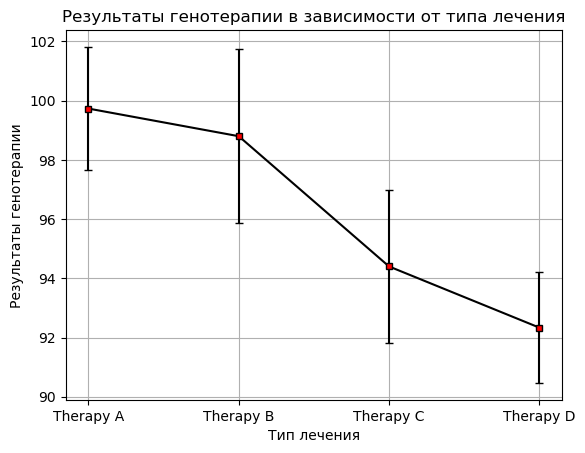

In [65]:
"""Построение графика доверительных интервалов"""
import matplotlib.pyplot as plt

A_mean = data_grouped.loc["A"][1]
B_mean = data_grouped.loc["B"][1]
C_mean = data_grouped.loc["C"][1]
D_mean = data_grouped.loc["D"][1]
A_sd = data_grouped.loc["A"][2]
B_sd = data_grouped.loc["B"][2]
C_sd = data_grouped.loc["C"][2]
D_sd = data_grouped.loc["D"][2]

groups = ['Therapy A', 'Therapy B', 'Therapy C', 'Therapy D']
mean = [A_mean, B_mean, C_mean, D_mean]
sd = [A_sd/2, B_sd/2, C_sd/2, D_sd/2]

plt.errorbar(x=groups, y=mean, yerr=sd, color="black", capsize=3, marker="s", markersize=5, mfc="red", mec="black")
plt.title('Результаты генотерапии в зависимости от типа лечения')
plt.xlabel('Тип лечения')
plt.ylabel('Результаты генотерапии')
plt.grid()
plt.show()

## 2.5 Множественные сравнения в ANOVA<a id='2.5'></a>